# Анализ успешности компьютерной игры

Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation).Есть данные до 2016 года. Планируется кампания на 2017-й. Нужно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.

В наборе данных попадается аббревиатура ESRB (Entertainment Software Rating Board) — это ассоциация, определяющая возрастной рейтинг компьютерных игр c 1994 года. Возрастной рейтинг:

+ «EC» («Early childhood») — «Для детей младшего возраста»
+ «E» («Everyone») — «Для всех»
+ «E10+» («Everyone 10 and older») — «Для всех старше 10 лет»
+ «T» («Teen») — «Подросткам 13—19 лет»
+ «M» («Mature») — «От 17 лет»
+ «AO» («Adults Only 18+»
+ «RP» ( «Rating Pending»») — «Рейтинг ожидается»:


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats as st

In [2]:
dt = pd.read_csv('/Users/aleksandrgrisenkin/Desktop/df/5. Изучение закономерностей, определяющих успешность игр/5. Изучение закономерностей, определяющих успешность игр.csv')

In [3]:
dt.info()
dt.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


# Вывод

Датасет состоит из 11 столбцов и 16715 строк. 

После просмотра таблицы видны ошибки:
Название столбцов начинаются с верхнего регистра 

Так же необходимо преобразовать в другой тип данных столбец User_Score в float

Пропущены значения в столбюцах: "оценка критиков","оценка пользователей","рейтинг"

Можно предположить, что данные пропущены по причине того, что определнная игравая платформа не рассчитывала оценки и рейтинги можно сделать срез и проверить после того как приведем все к нужному типу.


А еще интересны 2 пропущеных значений в столбце Name и 269 пропущеных значений в стодбце Year_of_Release нужно проверить

# Шаг 2. Подготовьте данные

In [4]:
dt.columns = dt.columns.str.lower() #сменил название столбцов на нижний решгистр 

In [5]:
dt.loc[dt['name'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


Итак, тут оказалось что в эти 2х значений почти нет данных, поэтому их можно удалить так как они не повлияют на анализ

In [6]:
nan_yaer = dt.loc[dt['year_of_release'].isna()]
nan_yaer

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
183,Madden NFL 2004,PS2,NaN,Sports,4.26,0.26,0.01,0.71,94.0,8.5,E
377,FIFA Soccer 2004,PS2,NaN,Sports,0.59,2.36,0.04,0.51,84.0,6.4,E
456,LEGO Batman: The Videogame,Wii,NaN,Action,1.80,0.97,0.00,0.29,74.0,7.9,E10+
475,wwe Smackdown vs. Raw 2006,PS2,NaN,Fighting,1.57,1.02,0.00,0.41,NaN,NaN,NaN
609,Space Invaders,2600,NaN,Shooter,2.36,0.14,0.00,0.03,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16373,PDC World Championship Darts 2008,PSP,NaN,Sports,0.01,0.00,0.00,0.00,43.0,tbd,E10+
16405,Freaky Flyers,GC,NaN,Racing,0.01,0.00,0.00,0.00,69.0,6.5,T
16448,Inversion,PC,NaN,Shooter,0.01,0.00,0.00,0.00,59.0,6.7,M
16458,Hakuouki: Shinsengumi Kitan,PS3,NaN,Adventure,0.01,0.00,0.00,0.00,NaN,NaN,NaN


269 пропущены значений это 1,6% от 16715 их заполнять не будем, можно удалить, но я думаю оставить.
Заполнять нужно в том случае, когда алгоритм, для которого готовятся
данные, чувствителен к пропускам. 

Например, регрессии и нейросети - чувствительны, а корреляция и стат-тесты нет (хотя для стат-тестов пропуски нужно удалять)."

In [7]:
dt.loc[dt['user_score'] == 'tbd', 'user_score'] = float('nan')
dt['user_score'] = dt['user_score'].astype(float)

Значение tbd с помощью среза заменили на "nan" и приравняли столбец к значению float

In [8]:
dt.info()
dt.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       7590 non-null   float64
 10  rating           9949 non-null   object 
dtypes: float64(7), object(4)
memory usage: 1.4+ MB


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


завершили предобработку данных:

удалили не нужные значения и данные привели к нжному типу 


In [9]:
dt['sum_sale'] = dt['na_sales'] + dt['eu_sales'] + dt['jp_sales'] + dt['other_sales']

In [10]:
dt.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sum_sale
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN,40.24
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN,31.38


Посчитал суммарные продажи во всех регионах и записал их в отдельный столбец.

# Шаг 3. Проведите исследовательский анализ данных

Посмотрите, сколько игр выпускалось в разные годы. Важны ли данные за все периоды?

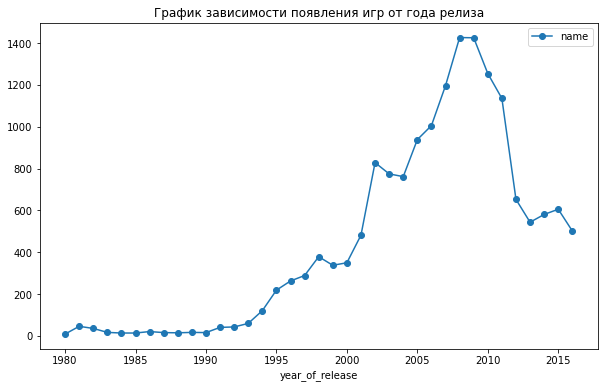

In [11]:
sum_games_yaer = dt.pivot_table(index = 'year_of_release', values = 'name', aggfunc = 'count')\
                .plot( style="-o",figsize=(10,6),title='График зависимости появления игр от года релиза')

Пик выпуска игр пришел на 2007,2008 года после количество игр в год стало падать 
я думаю важные даты с 2000 года, потому-что в предыдущие года выходило не так много игр и это не удивительно, рынок был на стадии становления.


Посмотрите, как менялись продажи по платформам. Выберите платформы с наибольшими суммарными продажами и постройте распределение по годам. За какой характерный срок появляются новые и исчезают старые платформы?


In [13]:
best_platform_sale = dt.groupby(by = 'platform')['sum_sale'].sum().sort_values(ascending=False)

In [14]:
best_platform_sale

platform
PS2     1255.77
X360     971.42
PS3      939.65
Wii      907.51
DS       806.12
PS       730.86
GBA      317.85
PS4      314.14
PSP      294.05
PC       259.52
3DS      259.00
XB       257.74
GB       255.46
NES      251.05
N64      218.68
SNES     200.04
GC       198.93
XOne     159.32
2600      96.98
WiiU      82.19
PSV       54.07
SAT       33.59
GEN       30.77
DC        15.95
SCD        1.86
NG         1.44
WS         1.42
TG16       0.16
3DO        0.10
GG         0.04
PCFX       0.03
Name: sum_sale, dtype: float64

In [15]:
data_plat=dt.pivot_table(index="platform",columns='year_of_release',values='sum_sale',aggfunc=('sum'))


<AxesSubplot:xlabel='year_of_release', ylabel='platform'>

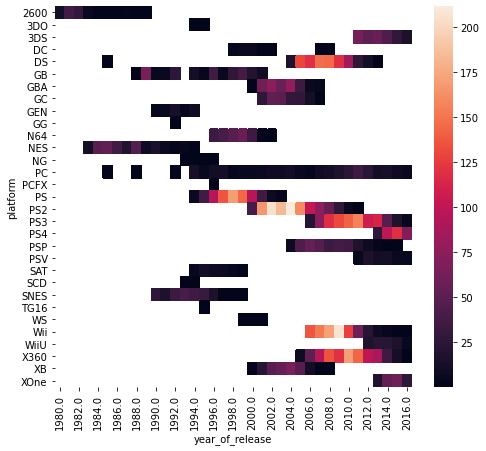

In [16]:
plt.figure(figsize=(8,7))
sns.heatmap(data_plat)

сделаю список топ10 платформ

In [17]:
top_platforms = ['PS2','X360','PS3','Wii','DS','PS','GBA','PS4','PSP','PC']

In [18]:
data_plat_top=dt.query('platform in @top_platforms').pivot_table(index="platform",columns='year_of_release',values='sum_sale',aggfunc=('sum'))


<AxesSubplot:xlabel='year_of_release', ylabel='platform'>

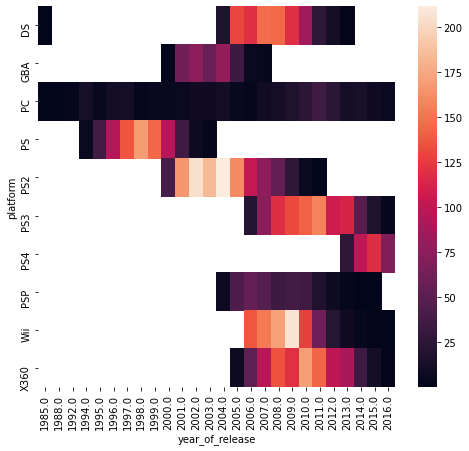

In [19]:
plt.figure(figsize=(8,7))
sns.heatmap(data_plat_top)

По тепловой карте видно:

Платформа в среднем живет 10-12 лет. 

Пик продаж приходит в среднем на середину срока жизни плтаформы (5-6 лет). 

Компания PS начинает релиз новой платформы во время пика действующей (кстати, это тоже влияет на продажи).

На рынок вернулась платформа DS в 2004 году. 

Платформа Wii с первого года имела высокие продажи. Но последние годы ее продажи падают.

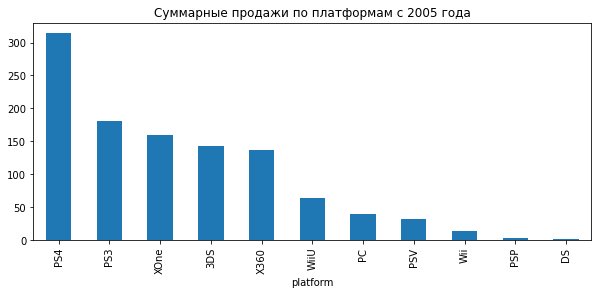

In [20]:
#Срез по году. 
#для анализа игр на 2017 год принимаю актуальные года с 2013 года.

actual_data=dt.query('year_of_release>=2013')
actual_data= actual_data.groupby('platform')['sum_sale']\
                        .sum().sort_values(ascending=False)\
                        .plot(figsize=(10,4),kind="bar",title='Суммарные продажи по платформам с 2005 года')

In [21]:
top_platform=['3DS','PS3','PS4','X360','XOne', 'Wii'] 

In [22]:
top_platform=data_plat.query('platform in @top_platform ')


<AxesSubplot:xlabel='year_of_release', ylabel='platform'>

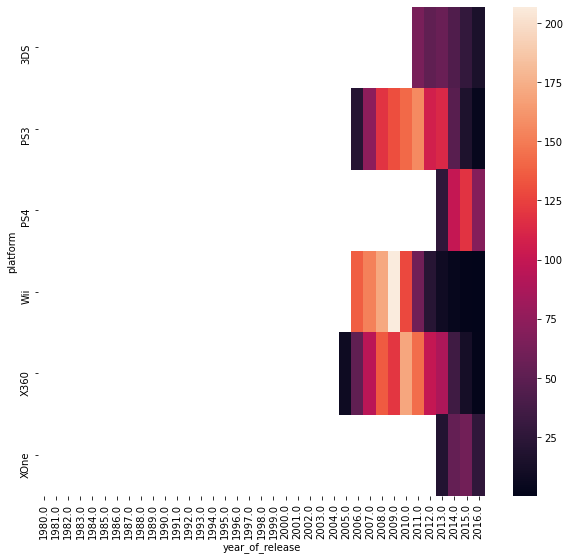

In [23]:
plt.figure(figsize=(10,9))
sns.heatmap(top_platform)

Исходя из данных c 2013 года , сейчас идет активный рост у ps4, хотя в последний год наблюдается снижение, но я думаю это отражается факт общего объема выпускаемых игр.

Поэтому делаю вывод -  2017 будем выбирать платформу ps4 потому, что она еще активна и на ней хорошие продажи, а так же можно выбрать игры на xOne


Построим график «ящик с усами» по глобальным продажам игр в разбивке по платформам. Опишите результат.

<AxesSubplot:xlabel='platform', ylabel='sum_sale'>

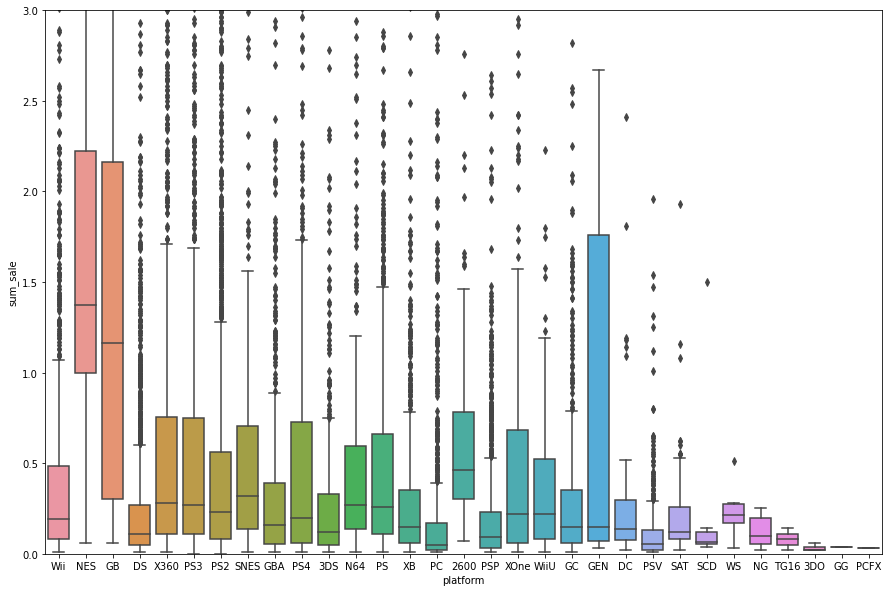

In [24]:
plt.figure(figsize=(15,10))
plt.ylim(0,3)
sns.boxplot(x='platform',y='sum_sale',data=dt)

Межквартальный размах очень похож у платфором X360, PS3, PS4, PS, XOne. У них примерно одинаковая медиана около 0.28 млн. 3 квартиль заканчивается примерно 0.7 млн. Все распрадаления платформ скошены вправо. Можно сказать, что у всех ящиков медина лежит левее среднего значения. У компаний, у которых пользовательский интерес ниже имеют медину (второй квартиль) около 0.1-0.2.

In [25]:
actual_data=dt.query('year_of_release>=2008')


In [26]:
actual_data

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sum_sale
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E,28.32
14,Kinect Adventures!,X360,2010.0,Misc,15.00,4.89,0.24,1.69,61.0,6.3,E,21.82
15,Wii Fit Plus,Wii,2009.0,Sports,9.01,8.49,2.53,1.77,80.0,7.4,E,21.80
...,...,...,...,...,...,...,...,...,...,...,...,...
16707,Aiyoku no Eustia,PSV,2014.0,Misc,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01
16709,SCORE International Baja 1000: The Official Game,PS2,2008.0,Racing,0.00,0.00,0.00,0.00,NaN,NaN,NaN,0.00
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01


<AxesSubplot:title={'center':'Диаграмма рассеяния зависимости продаж платформы  PS3 от отзывов критиков'}, xlabel='critic_score', ylabel='sum_sale'>

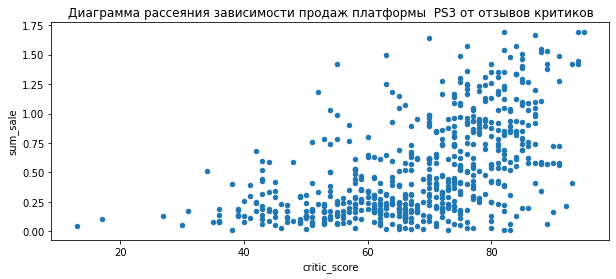

In [27]:
actual_data.query('platform=="PS3" and sum_sale<=1.7').sort_values(by='critic_score',ascending=True).plot(kind='scatter',x='critic_score',y='sum_sale',figsize=(10,4),title='Диаграмма рассеяния зависимости продаж платформы  PS3 от отзывов критиков')

<AxesSubplot:title={'center':'Диаграмма рассеяния зависимости продаж платформы  PS3 от отзывов пользователей'}, xlabel='user_score', ylabel='sum_sale'>

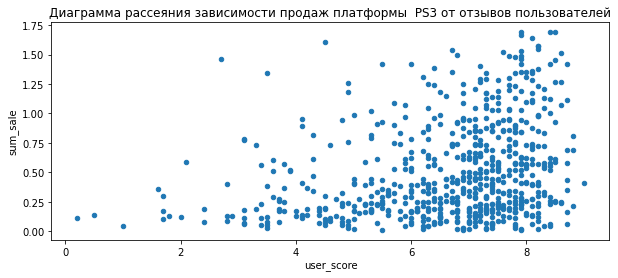

In [28]:
actual_data.query('platform=="PS3" and sum_sale<=1.7').sort_values(by='user_score',ascending=True).plot(kind='scatter',x='user_score',y='sum_sale',figsize=(10,4),title='Диаграмма рассеяния зависимости продаж платформы  PS3 от отзывов пользователей')

По графикам видно, что есть зависимость между оценкой критиков и пользователей, но не большая. 
Чем больше балл, там больше продажи. Положительная корреляция. 


Плотнее всего с оценками пользователей в районе от 6-8 баллов с продажами до 0,75 млн. 

Что касается оценки критиков, то у них плотнее всего в районе от 65-75 баллов и до 0.50 млн. 
 


In [29]:
ps3_actual=actual_data.query('platform=="PS3" and sum_sale<=1.7')
ps3_actual['sum_sale'].corr(ps3_actual['user_score'])

0.28316608154914075

In [30]:
ps3_actual['sum_sale'].corr(ps3_actual['critic_score'])

0.5464235079020999

Зависимость между продажами и отзывами критиков есть, но ниже средней. 

Корреляция положительная. 

Чем лучше отзыв критика, тем выше продажи. 

Отзывы пользователей не так сильно вляют на продажи. Корреляция слабая.

<AxesSubplot:title={'center':'Распределение по жанрам и количеством продаж'}, xlabel='genre'>

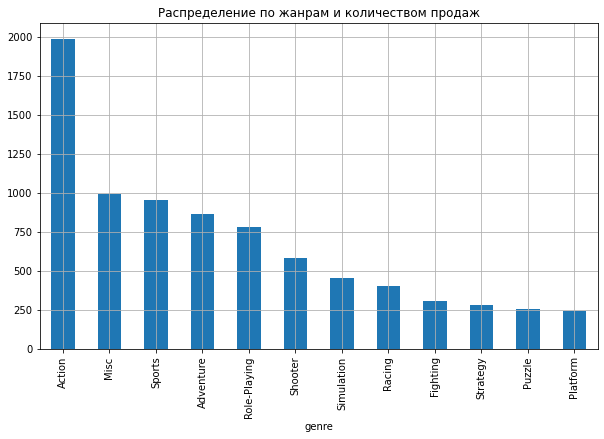

In [31]:
count_genre=actual_data.groupby('genre')['sum_sale'].count().sort_values(ascending=False)
count_genre.plot(y='genre',grid=True,figsize=(10,6),kind='bar',title='Распределение по жанрам и количеством продаж')

Больше всего пользователи покупают игры в жанре Action, а меньше всего игры в жанре puzzle, strategy. Разница в количестве продаж почти в 6,5 раз. Следом по популярности после Action идет жанр Sport

# Составьте портрет пользователя каждого региона
Определить для пользователя каждого региона (NA, EU, JP) cамые популярные платформы (топ-5). Описать различия в долях продаж


In [32]:
na_sales_platform=actual_data.pivot_table(index='platform',values=['na_sales','sum_sale'],aggfunc=('sum'))
na_sales_platform=na_sales_platform.sort_values(by='na_sales',ascending=False).head(5)
na_sales_platform

,na_sales,sum_sale
platform,,
X360,490.69,805.96
PS3,349.13,837.19
Wii,332.87,601.26
DS,198.73,388.60
PS4,108.74,314.14


Самая популярная платформа в Америке- X360, на втором месте PS3. PS4 на пятом месте.

ps 2 не вошла в отбор так как продажи  с 2008 года.



In [33]:
eu_sales_platform=actual_data.pivot_table(index='platform',values=['eu_sales','sum_sale'],aggfunc=('sum'))
eu_sales_platform=eu_sales_platform.sort_values(by='eu_sales',ascending=False).head(5)
eu_sales_platform

,eu_sales,sum_sale
platform,,
PS3,293.73,837.19
X360,234.88,805.96
Wii,170.74,601.26
PS4,141.09,314.14
PC,92.17,151.29


Самая популярная платформа в Европе- PS3, затем x360. На 5 месте PC.

В европе часто играют на pc помимо приставок 

In [34]:
jp_sales_platform=actual_data.pivot_table(index='platform',values=['jp_sales','sum_sale'],aggfunc=('sum'))
jp_sales_platform=jp_sales_platform.sort_values(by='jp_sales',ascending=False).head(5)
jp_sales_platform

,jp_sales,sum_sale
platform,,
3DS,100.62,257.81
DS,76.12,388.60
PS3,74.11,837.19
PSP,60.46,136.38
Wii,47.01,601.26


Самая популярная платформа в Японии DS, затем PS3. На 3 месте PSP.

Рынок Японии любит портативные консоли 

In [35]:
na_sales_platform['% sales']=na_sales_platform['na_sales']/na_sales_platform['sum_sale']
eu_sales_platform['% sales']=eu_sales_platform['eu_sales']/eu_sales_platform['sum_sale']
jp_sales_platform['% sales']=jp_sales_platform['jp_sales']/jp_sales_platform['sum_sale']


<AxesSubplot:ylabel='% sales'>

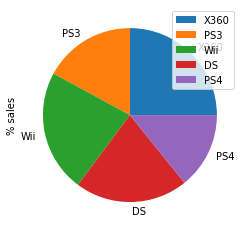

In [36]:
na_sales_platform.plot(kind='pie',y="% sales")

на Американском рынке платформа X360 и Wii вместе занимают почти 1/3. 

PS2 и PS3 имеют равные доли продаж, скорее всего те у кого был ps3 апгрейднулись на ps4 поэтому доля та же. 




<AxesSubplot:ylabel='% sales'>

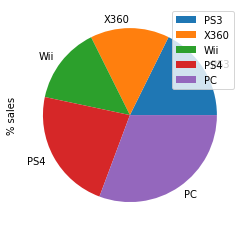

In [37]:
eu_sales_platform.plot(kind='pie',y="% sales")

В Европе большое количество людей играет на Pc примерно 40% от всех продаж были там!

четверть продаж имеет платформа PS4 от суммы всех продаж этой платформы. Доли продаж X360, PS3, Wii почти одинаковы и составляют около 15%.

<AxesSubplot:ylabel='% sales'>

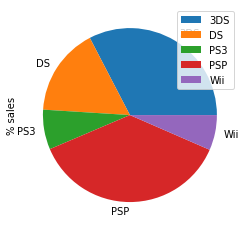

In [38]:
jp_sales_platform.plot(kind='pie',y="% sales")

В Японии платформа PSP популярнее даже чем PC в Европе! 
на 3 месте по рейтингу а по продажам по регионам явный лидер!
Стоит обратить внимание!

А вот PS занимает маленькую долю в продажах

# Самые популярные жанры (топ-5). Пояснить разницу.

In [39]:
na_sales_genre=actual_data.pivot_table(index='genre',values='na_sales',aggfunc=('sum'))

In [40]:
na_sales_genre=na_sales_genre.sort_values(by='na_sales',ascending=False).head(5)
na_sales_genre

,na_sales
genre,
Action,433.74
Shooter,311.26
Sports,276.27
Misc,211.61
Role-Playing,155.81


Самый популярный жанр в Америке- это Action Shooter и Sport

In [41]:
eu_sales_genre = actual_data.pivot_table(index = 'genre', values = 'eu_sales', aggfunc = ('sum')).head(5)

In [42]:
eu_sales_genre = eu_sales_genre.sort_values(by = 'eu_sales',ascending=False)
eu_sales_genre

,eu_sales
genre,
Action,310.59
Misc,107.00
Platform,60.20
Fighting,34.73
Adventure,29.87


В Европе самый популярный жанр такой же как и в Америке

In [43]:
jp_sales_genre=actual_data.pivot_table(index='genre',values='jp_sales',aggfunc=('sum'))


In [44]:
jp_sales_genre=jp_sales_genre.sort_values(by='jp_sales',ascending=False).head(5)
jp_sales_genre

,jp_sales
genre,
Role-Playing,138.12
Action,90.16
Misc,37.33
Sports,30.69
Adventure,23.36


А вот в Японии самый популярный жанр Role-Playing ! а вот второе место у Action и Sport.

<AxesSubplot:ylabel='jp_sales'>

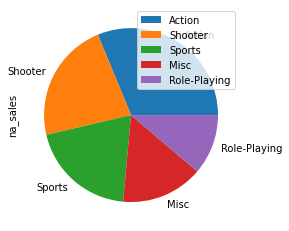

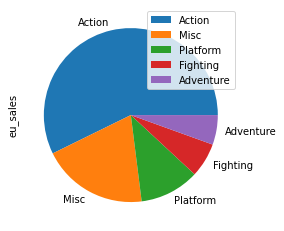

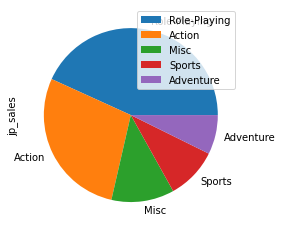

In [45]:
na_sales_genre.plot(kind='pie',y="na_sales")
eu_sales_genre.plot(kind='pie',y="eu_sales")
jp_sales_genre.plot(kind='pie',y="jp_sales")

Если брать в расчет доли продаж и суммы то однозначно надо делать игру в жанре экшн

на втором месте спорт и для рынка Японии отдельно Ролевые игры.

Еще стоит обратить внимание на жанр Misc у него везде есть доли и не маленькие

# Влияет ли рейтинг ESRB на продажи в отдельном регионе?

In [46]:
na_sales_ESRB=actual_data.pivot_table(index='rating',values='na_sales',aggfunc=('sum'))

In [47]:
na_sales_ESRB=na_sales_ESRB.sort_values(by='na_sales',ascending=False)
na_sales_ESRB

,na_sales
rating,
E,536.93
M,502.60
T,303.41
E10+,251.88
EC,1.32
RP,0.00


In [48]:
eu_sales_ESRB=actual_data.pivot_table(index='rating',values=['eu_sales'],aggfunc=('sum'))


In [49]:
eu_sales_ESRB=eu_sales_ESRB.sort_values(by='eu_sales',ascending=False)
eu_sales_ESRB

,eu_sales
rating,
M,362.65
E,326.61
T,187.62
E10+,144.53
RP,0.03
EC,0.00


In [50]:
jp_sales_ESRB=actual_data.pivot_table(index='rating',values=['jp_sales'],aggfunc=('sum'))


In [51]:
jp_sales_ESRB=jp_sales_ESRB.sort_values(by='jp_sales',ascending=False)
jp_sales_ESRB

,jp_sales
rating,
E,77.17
T,64.51
M,39.33
E10+,25.67
EC,0.00
RP,0.00


построю гистограммы рейтингов по разным регионам:

<AxesSubplot:xlabel='rating'>

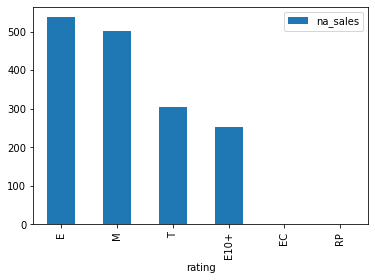

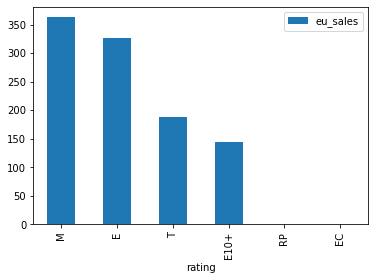

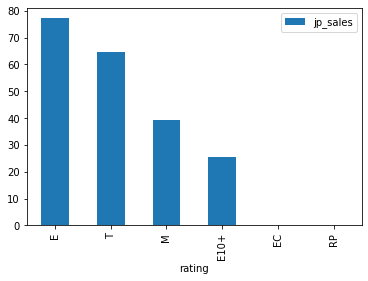

In [52]:
na_sales_ESRB.plot(kind='bar') 
eu_sales_ESRB.plot(kind='bar')
jp_sales_ESRB.plot(kind='bar') 

В Америке, Европе, Японии есть 4 лидера рейтинга ограничений - E, T, M, E10+. 

Больше всего М (от 17), 

Затем Е (для Всех). 



Категории Т (для подростков 13-19 лет) в Японии гораздо больше чем в остальных регионах. 


Можно сделать вывод, что возрастное ограничение влияет на продажи. 


Т.е выпуская новый продукт нужно понимать, что большей популярностью пользуются продукты с возрастным ограничением в регионах Америки и Европы это М и E а в Японии это Категория Т. 

Анализируя будующие продажи на 2017 год можнос уверенностью сказать, что хорошие продажи можно получить у платформ '3DS','PS3','PS4','X360','PC'. 

Также обратить внимание что в Японии хорошо продаются игры на PSP. 

Что касается жанров, то тут самые продаваемые Action, Sport, Shooter с ориентацией для подростков от 17 лет и для всех.

# Проверка гипотезы:

## Средние пользовательские рейтинги платформ Xbox One и PC одинаковые
Нулевая гипотеза: cредний пользовательский рейтинг платформы XOne и PC равны.

Альтернативная гипотеза: cредний пользовательский рейтинг платформы XOne и PC не равны.

Расчитаем среднее дисперсию и стандартное откланение для XOne

In [53]:
XOne_data=dt.query('platform=="XOne" and year_of_release>=2013').dropna()


In [54]:
PC_data=dt.query('platform=="PC" and year_of_release>=2013').dropna()


In [55]:
mean_XOne=XOne_data['user_score'].mean()
print('Среднее значение пользовательского рейтинга платформы XOne:',mean_XOne)


Среднее значение пользовательского рейтинга платформы XOne: 6.493081761006291


In [56]:
variance_XOne=np.var(XOne_data['user_score'],ddof=1)
print('Дисперсия для платформы XOne:',variance_XOne)

Дисперсия для платформы XOne: 1.7914075312475117


In [57]:
standart_deviation_XOne=np.sqrt(variance_XOne)
print('Стандартное отклонение для платформы XOne:',standart_deviation_XOne)

Стандартное отклонение для платформы XOne: 1.3384347317846739


Расчитаем среднее дисперсию и стандартное откланение дял PC

In [58]:
mean_PC=PC_data['user_score'].mean()
print('Среднее значение пользовательского рейтинга платформы XOne:',mean_PC)

Среднее значение пользовательского рейтинга платформы XOne: 6.218796992481201


In [59]:
variance_PC=np.var(PC_data['user_score'],ddof=1)
print('Дисперсия для платформы PC:',variance_PC)

Дисперсия для платформы PC: 3.0898712690817964


In [60]:
standart_deviation_PC=np.sqrt(variance_PC)
print('Стандартное отклонение для платформы PC:',standart_deviation_PC)

Стандартное отклонение для платформы PC: 1.7578029665129697


Нулевая гипотеза: cредний пользовательский рейтинг платформы XOne и PC равны.

In [61]:
alpha=.05

In [62]:
result=st.ttest_ind(XOne_data['user_score'],PC_data['user_score'],equal_var=False) 

In [63]:
print('Значение p-value:', result.pvalue)

Значение p-value: 0.14104275299383137


In [64]:
if result.pvalue<alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Отвергнуть нулевую гипотезу не удалось')

Отвергнуть нулевую гипотезу не удалось


Нулевую гипотеза не отвергнута. Средние значения двух выборок пользовательских рейтингов платформы XOne и PC равны за период с 2013 года



## Средние пользовательские рейтинги жанров Action (англ. «действие») и Sports (англ. «виды спорта») разные.


In [65]:
action_data=dt.query('genre=="Action"').dropna()

In [66]:
mean_action=action_data['user_score'].mean()
print('Среднее значение жанра Action пользовательского рейтинга:',mean_action)

Среднее значение жанра Action пользовательского рейтинга: 7.09582822085889


In [67]:
variance_action_data=np.var(action_data['user_score'],ddof=1)
print('Дисперсия жанра Action пользовательского рейтинга:',variance_action_data)

Дисперсия жанра Action пользовательского рейтинга: 1.9492766310017402


In [68]:
standart_deviation_action=np.sqrt(variance_action_data)
print('Стандартное отклонение жанра Action пользовательского рейтинга:',standart_deviation_action)

Стандартное отклонение жанра Action пользовательского рейтинга: 1.3961649727026317


In [69]:
sport_data=dt.query('genre=="Sports"').dropna()

In [70]:
mean_sport=sport_data['user_score'].mean()
print('Среднее значение жанра Sport пользовательского рейтинга:',mean_sport)

Среднее значение жанра Sport пользовательского рейтинга: 7.110816542948041


In [71]:
variance_sport_data=np.var(sport_data['user_score'],ddof=1)
print('Дисперсия жанра Sport пользовательского рейтинга:',variance_sport_data)

Дисперсия жанра Sport пользовательского рейтинга: 2.107101561849186


In [72]:
standart_deviation_sport=np.sqrt(variance_sport_data)
print('Стандартное отклонение жанра Sport пользовательского рейтинга:',standart_deviation_sport)

Стандартное отклонение жанра Sport пользовательского рейтинга: 1.451585878220502


Нулевая гипотеза: cредний пользовательский рейтинг Action и Sports  равны. 

In [73]:
alpha=.05

In [74]:
interested_value=mean_action # среднее значение Action. С ним будем сравнивать среднее выборки Sports


In [75]:
#result=st.ttest_1samp(sport_data['user_score'],interested_value) # ttest для проверки 
result=st.ttest_ind(action_data['user_score'],sport_data['user_score'],equal_var=False) 
print('p-value:',result.pvalue)

p-value: 0.7980492910095923


In [76]:
if (result.pvalue<alpha):
    print('Отвергаем нулевую гипотезу')
else:
    print('Не удалось отвергнуть нулевую гипотезу')

Не удалось отвергнуть нулевую гипотезу


Действительно cредний пользовательский рейтинг Action и Sports  равны со статистической значимостью alpha=5%.

# Вывод


Итак закономерности определяющие успешность продаж игр:

1) платформа для которой будет продаваться игра.

Лидеры в данном пункте это приставки PS и Xone, В европе хорошую долю рынка забирают PC, а вот в Японии так же людям нравятся портативные присатвки.

2) Далее это жанр: 

Тут без вариантов - это Action, Sport, Shooter и Misk для Японии супер актуальынй жанр это Ролевые игры.

3) Рейтинг игры: 

Это однозначно рейтинг М и Е, а вот для Японии это категория Т.


Если правильно применить эти знания, то можно купить отличную партию супер популярных игра на нужные платформы.



